In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import cv2
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow. keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping  # Use TensorFlow's Keras API directly
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hemooredaoo/cataract

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/hemooredaoo/cataract
License(s): unknown
 99% 545M/552M [00:09<00:00, 51.6MB/s]
100% 552M/552M [00:09<00:00, 58.8MB/s]


In [ ]:
!unzip '/content/cataract.zip'

Archive:  /content/cataract.zip
  inflating: cataract-image-dataset/processed_images/test/cataract/image_246.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_247.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_248.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_249.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_250.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_251.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_252.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_253.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_254.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_255.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_256.png  
  inflating: cataract-image-dataset/processed_images/te

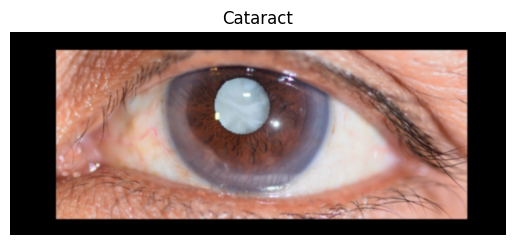

In [ ]:
#Load an image using OpenCV

image_path = '/content/drive/MyDrive/ai_tensorflow_projects/cataract-image-dataset/processed_images/train/cataract/108.jpg'
img = cv2.imread(image_path)

# Convert BGR image to RGB

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib

plt.imshow(img_rgb)

plt.title('Cataract')

plt.axis('off') # Turn off axis labels

plt.show()

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 rotation_range=48,
                                 fill_mode='nearest',
                                 horizontal_flip=True,
                                 shear_range=0.2)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_directory='/content/drive/MyDrive/ai_tensorflow_projects/cataract-image-dataset/processed_images/train'
test_directory='/content/drive/MyDrive/ai_tensorflow_projects/cataract-image-dataset/processed_images/test'

training_set = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='binary'
    )

test_set = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='binary'
    )

Found 978 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
vgg = VGG16(include_top=False, input_shape=(224,224,3))

for layer in vgg.layers:
  layer.trainable = False

x= Flatten()(vgg.output)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)
vgg16 = Model(inputs=vgg.input,outputs=output)

vgg16.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
vgg16.fit(training_set, validation_data=test_set,epochs=20)

Epoch 1/20
31/31 [==============================] - 804s 26s/step - loss: 3.1086 - accuracy: 0.6360 - val_loss: 0.3872 - val_accuracy: 0.8678
Epoch 2/20
31/31 [==============================] - 771s 25s/step - loss: 0.4986 - accuracy: 0.8415 - val_loss: 0.1426 - val_accuracy: 0.9504
Epoch 3/20
31/31 [==============================] - 772s 25s/step - loss: 0.2987 - accuracy: 0.8732 - val_loss: 0.2118 - val_accuracy: 0.9008
Epoch 4/20
31/31 [==============================] - 766s 25s/step - loss: 0.2399 - accuracy: 0.8865 - val_loss: 0.1393 - val_accuracy: 0.9421
Epoch 5/20
31/31 [==============================] - 757s 24s/step - loss: 0.2352 - accuracy: 0.8978 - val_loss: 0.1124 - val_accuracy: 0.9587
Epoch 6/20
31/31 [==============================] - 756s 24s/step - loss: 0.1976 - accuracy: 0.9192 - val_loss: 0.1164 - val_accuracy: 0.9587
Epoch 7/20
31/31 [==============================] - 752s 24s/step - loss: 0.2185 - accuracy: 0.9172 - val_loss: 0.1150 - val_accuracy: 0.9587
Epoch 

In [ ]:
# Fine-tuning: Unfreeze some layers of the base model
for layer in vgg.layers[-4:]:  # Unfreeze the last 4 layers of the base model
    layer.trainable = True

# Recompile the model with a lower learning rate
vgg16.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

# Print the model summary again after unfreezing some layers
vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Continue training for fine-tuning
history_fine_tune = vgg16.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/10
31/31 [==============================] - 896s 29s/step - loss: 0.1110 - accuracy: 0.9530 - val_loss: 0.0588 - val_accuracy: 0.9587
Epoch 2/10
31/31 [==============================] - 943s 31s/step - loss: 0.1026 - accuracy: 0.9591 - val_loss: 0.0672 - val_accuracy: 0.9669
Epoch 3/10
31/31 [==============================] - 885s 29s/step - loss: 0.1028 - accuracy: 0.9581 - val_loss: 0.0535 - val_accuracy: 0.9669
Epoch 4/10
31/31 [==============================] - 888s 29s/step - loss: 0.0764 - accuracy: 0.9744 - val_loss: 0.0536 - val_accuracy: 0.9669
Epoch 5/10
31/31 [==============================] - 937s 30s/step - loss: 0.0600 - accuracy: 0.9683 - val_loss: 0.0490 - val_accuracy: 0.9835
Epoch 6/10
31/31 [==============================] - 878s 28s/step - loss: 0.0591 - accuracy: 0.9755 - val_loss: 0.0521 - val_accuracy: 0.9835
Epoch 7/10
31/31 [==============================] - 884s 29s/step - loss: 0.0526 - accuracy: 0.9806 - val_loss: 0.0741 - val_accuracy: 0.9669
Epoch 

In [ ]:
vgg16.save('/content/drive/MyDrive/ai_tensorflow_projects/fine_tuned_vgg16.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# VGG19


In [ ]:
vgg = VGG19(include_top=False, input_shape=(224,224,3))

for layer in vgg.layers:
  layer.trainable = False

x= Flatten()(vgg.output)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)
vgg19 = Model(inputs=vgg.input,outputs=output)

vgg19.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
vgg19.fit(training_set, validation_data=test_set,epochs=10)

Epoch 1/10
31/31 [==============================] - 985s 32s/step - loss: 0.9598 - accuracy: 0.7597 - val_loss: 0.1956 - val_accuracy: 0.9174
Epoch 2/10
31/31 [==============================] - 990s 32s/step - loss: 0.4371 - accuracy: 0.8200 - val_loss: 0.2415 - val_accuracy: 0.8926
Epoch 3/10
31/31 [==============================] - 940s 30s/step - loss: 0.3204 - accuracy: 0.8722 - val_loss: 0.1845 - val_accuracy: 0.9421
Epoch 4/10
31/31 [==============================] - 928s 30s/step - loss: 0.2961 - accuracy: 0.8722 - val_loss: 0.1510 - val_accuracy: 0.9421
Epoch 5/10
31/31 [==============================] - 941s 30s/step - loss: 0.2842 - accuracy: 0.8845 - val_loss: 0.1492 - val_accuracy: 0.9421
Epoch 6/10
31/31 [==============================] - 925s 30s/step - loss: 0.2606 - accuracy: 0.8957 - val_loss: 0.1799 - val_accuracy: 0.9256
Epoch 7/10
31/31 [==============================] - 961s 31s/step - loss: 0.2548 - accuracy: 0.8967 - val_loss: 0.1414 - val_accuracy: 0.9421
Epoch 

In [ ]:
# Fine-tuning: Unfreeze some layers of the base model
for layer in vgg.layers[-4:]:  # Unfreeze the last 4 layers of the base model
    layer.trainable = True

# Recompile the model with a lower learning rate
vgg19.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

# Print the model summary again after unfreezing some layers
vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Continue training for fine-tuning
history_fine_tune = vgg19.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Epoch 1/10
31/31 [==============================] - 1121s 36s/step - loss: 0.1984 - accuracy: 0.9182 - val_loss: 0.1509 - val_accuracy: 0.9421
Epoch 2/10
31/31 [==============================] - 1156s 37s/step - loss: 0.1738 - accuracy: 0.9284 - val_loss: 0.1289 - val_accuracy: 0.9421
Epoch 3/10
31/31 [==============================] - 1123s 36s/step - loss: 0.1390 - accuracy: 0.9458 - val_loss: 0.1244 - val_accuracy: 0.9504
Epoch 4/10
31/31 [==============================] - 1108s 36s/step - loss: 0.1356 - accuracy: 0.9581 - val_loss: 0.1005 - val_accuracy: 0.9587
Epoch 5/10
31/31 [==============================] - 1138s 37s/step - loss: 0.0979 - accuracy: 0.9663 - val_loss: 0.0857 - val_accuracy: 0.9752
Epoch 6/10
31/31 [==============================] - 1093s 35s/step - loss: 0.0912 - accuracy: 0.9652 - val_loss: 0.0782 - val_accuracy: 0.9669
Epoch 7/10
31/31 [==============================] - 1117s 36s/step - loss: 0.0764 - accuracy: 0.9744 - val_loss: 0.0784 - val_accuracy: 0.9752

In [ ]:
vgg19.save('/content/drive/MyDrive/ai_tensorflow_projects/fine_tuned_vgg19.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
